In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import pd
import seaborn as sns

In [7]:
def recommendation_system_eda_layout(data):
    # Check for missing values
    missing_values = data.isnull().sum()
    print("Missing values in each column:\n", missing_values)

    # Summary statistics for numerical columns
    summary_stats = data.describe()
    print("\nSummary statistics for numerical columns:\n", summary_stats)

    # Unique users and movies
    unique_users = data['user_id'].nunique()
    unique_movies = data['movie_id'].nunique()
    print(f"\nUnique users: {unique_users}")
    print(f"Unique movies: {unique_movies}")

    # Create a grid of subplots
    fig, axs = plt.subplots(3, 2, figsize=(15, 10))

    # Distribution of ratings
    axs[0, 0].hist(data['rating'], bins=5, edgecolor='black', linewidth=1.2)
    axs[0, 0].set_title('Distribution of Ratings')
    axs[0, 0].set_xlabel('Rating')
    axs[0, 0].set_ylabel('Count')

    # Average rating per user
    avg_rating_per_user = data.groupby('user_id')['rating'].mean()
    sns.histplot(avg_rating_per_user, bins=30, kde=True, ax=axs[0, 1])
    axs[0, 1].set_title('Average Rating per User')
    axs[0, 1].set_xlabel('Average Rating')
    axs[0, 1].set_ylabel('Users')

    # Average rating per movie
    avg_rating_per_movie = data.groupby('movie_id')['rating'].mean()
    sns.histplot(avg_rating_per_movie, bins=30, kde=True, ax=axs[2, 0])
    axs[2, 0].set_title('Average Rating per Movie')
    axs[2, 0].set_xlabel('Average Rating')
    axs[2, 0].set_ylabel('Movies')

    # Number of ratings per user
    num_ratings_per_user = data.groupby('user_id')['rating'].count()
    sns.histplot(num_ratings_per_user, bins=30, kde=True, ax=axs[1, 0])
    axs[1, 0].set_title('Number of Ratings per User')
    axs[1, 0].set_xlabel('Number of Ratings')
    axs[1, 0].set_ylabel('Users')

    # Number of ratings per movie
    num_ratings_per_movie = data.groupby('movie_id')['rating'].count()
    sns.histplot(num_ratings_per_movie, bins=30, kde=True, ax=axs[1, 1])
    axs[1, 1].set_title('Number of Ratings per Movie')
    axs[1, 1].set_xlabel('Number of Ratings')
    axs[1, 1].set_ylabel('Movies')

    # Adjust the layout
    plt.tight_layout()
    plt.show()

In [8]:
import pandas as pd

def count_memory_count_min_sketch(df):
    widths = [100, 1000, 5000, 10000]
    depths = [5, 7, 10]
    for width in widths:
        for depth in depths:
            memory_size = 4 * width * depth
            temp_df = pd.DataFrame({'Algorithm': f'CMS(w={width},d={depth})', 'Memory (Bytes)': [memory_size]})
            df = pd.concat([df, temp_df], ignore_index=True)

    return df

def count_memory_hyperloglog(data, df, dataset):

    precisions = [7, 10, 11, 12, 13, 14]
    for precision in precisions:
        memory_size = 2 ** precision + 1
        temp_df = pd.DataFrame({'Algorithm': f'HyperLogLog(p={precision})', 'Memory (Bytes)': [memory_size]})
        df = pd.concat([df, temp_df], ignore_index=True)

    real_size = sys.getsizeof(data)
    temp_df = pd.DataFrame({'Algorithm': f'Real data({dataset})', 'Memory (Bytes)': [real_size]})
    df = pd.concat([df, temp_df], ignore_index=True)
    return df

Showing results for dataset: movielens_1m
Missing values in each column:
 user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

Summary statistics for numerical columns:
             user_id      movie_id        rating
count  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00
std    1.728413e+03  1.096041e+03  1.117102e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.506000e+03  1.030000e+03  3.000000e+00
50%    3.070000e+03  1.835000e+03  4.000000e+00
75%    4.476000e+03  2.770000e+03  4.000000e+00
max    6.040000e+03  3.952000e+03  5.000000e+00

Unique users: 6040
Unique movies: 3706


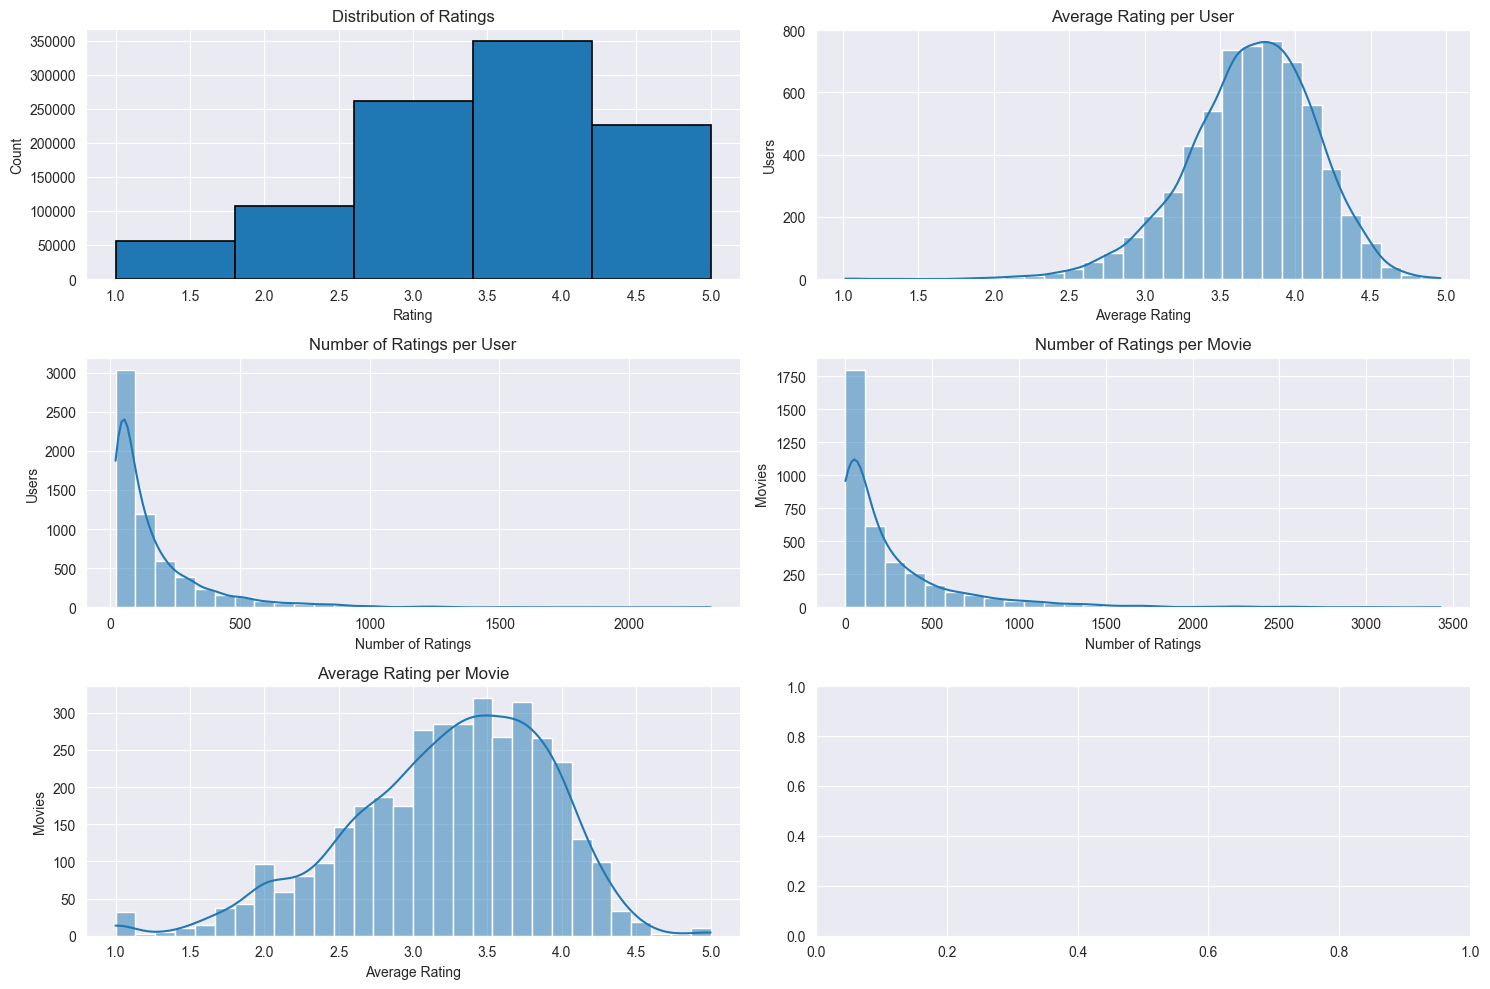

,Algorithm,Memory (Bytes)
0,"CMS(w=100,d=5)",2000
1,"CMS(w=100,d=7)",2800
2,"CMS(w=100,d=10)",4000
3,"CMS(w=1000,d=5)",20000
4,"CMS(w=1000,d=7)",28000
5,"CMS(w=1000,d=10)",40000
6,"CMS(w=5000,d=5)",100000
7,"CMS(w=5000,d=7)",140000
8,"CMS(w=5000,d=10)",200000
9,"CMS(w=10000,d=5)",200000


Showing results for dataset: movielens_10m
Missing values in each column:
 user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

Summary statistics for numerical columns:
             user_id      movie_id        rating
count  1.000005e+07  1.000005e+07  1.000005e+07
mean   3.586986e+04  4.120291e+03  3.512422e+00
std    2.058534e+04  8.938402e+03  1.060418e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    1.812300e+04  6.480000e+02  3.000000e+00
50%    3.574050e+04  1.834000e+03  4.000000e+00
75%    5.360800e+04  3.624000e+03  4.000000e+00
max    7.156700e+04  6.513300e+04  5.000000e+00

Unique users: 69878
Unique movies: 10677


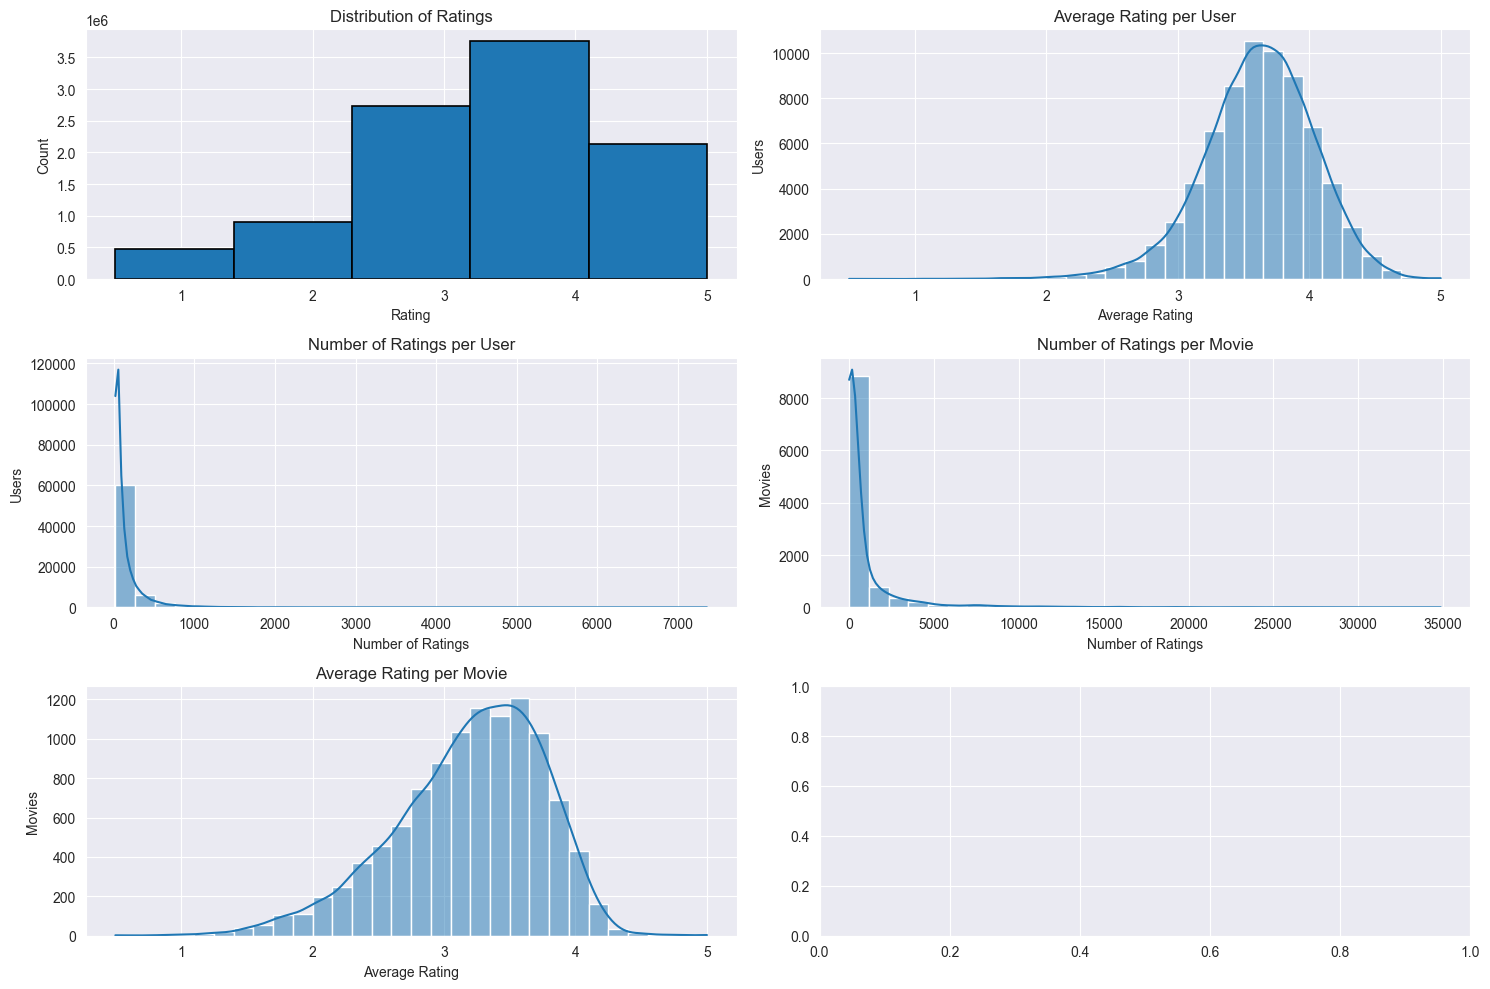

,Algorithm,Memory (Bytes)
0,"CMS(w=100,d=5)",2000
1,"CMS(w=100,d=7)",2800
2,"CMS(w=100,d=10)",4000
3,"CMS(w=1000,d=5)",20000
4,"CMS(w=1000,d=7)",28000
5,"CMS(w=1000,d=10)",40000
6,"CMS(w=5000,d=5)",100000
7,"CMS(w=5000,d=7)",140000
8,"CMS(w=5000,d=10)",200000
9,"CMS(w=10000,d=5)",200000


Showing results for dataset: netflix
Missing values in each column:
 user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

Summary statistics for numerical columns:
             user_id      movie_id        rating
count  2.405376e+07  2.405376e+07  2.405376e+07
mean   1.322285e+06  2.308324e+03  3.599634e+00
std    7.645779e+05  1.303909e+03  1.086118e+00
min    6.000000e+00  1.000000e+00  1.000000e+00
25%    6.609270e+05  1.180000e+03  3.000000e+00
50%    1.318602e+06  2.342000e+03  4.000000e+00
75%    1.984358e+06  3.433000e+03  4.000000e+00
max    2.649429e+06  4.499000e+03  5.000000e+00

Unique users: 470758
Unique movies: 4499


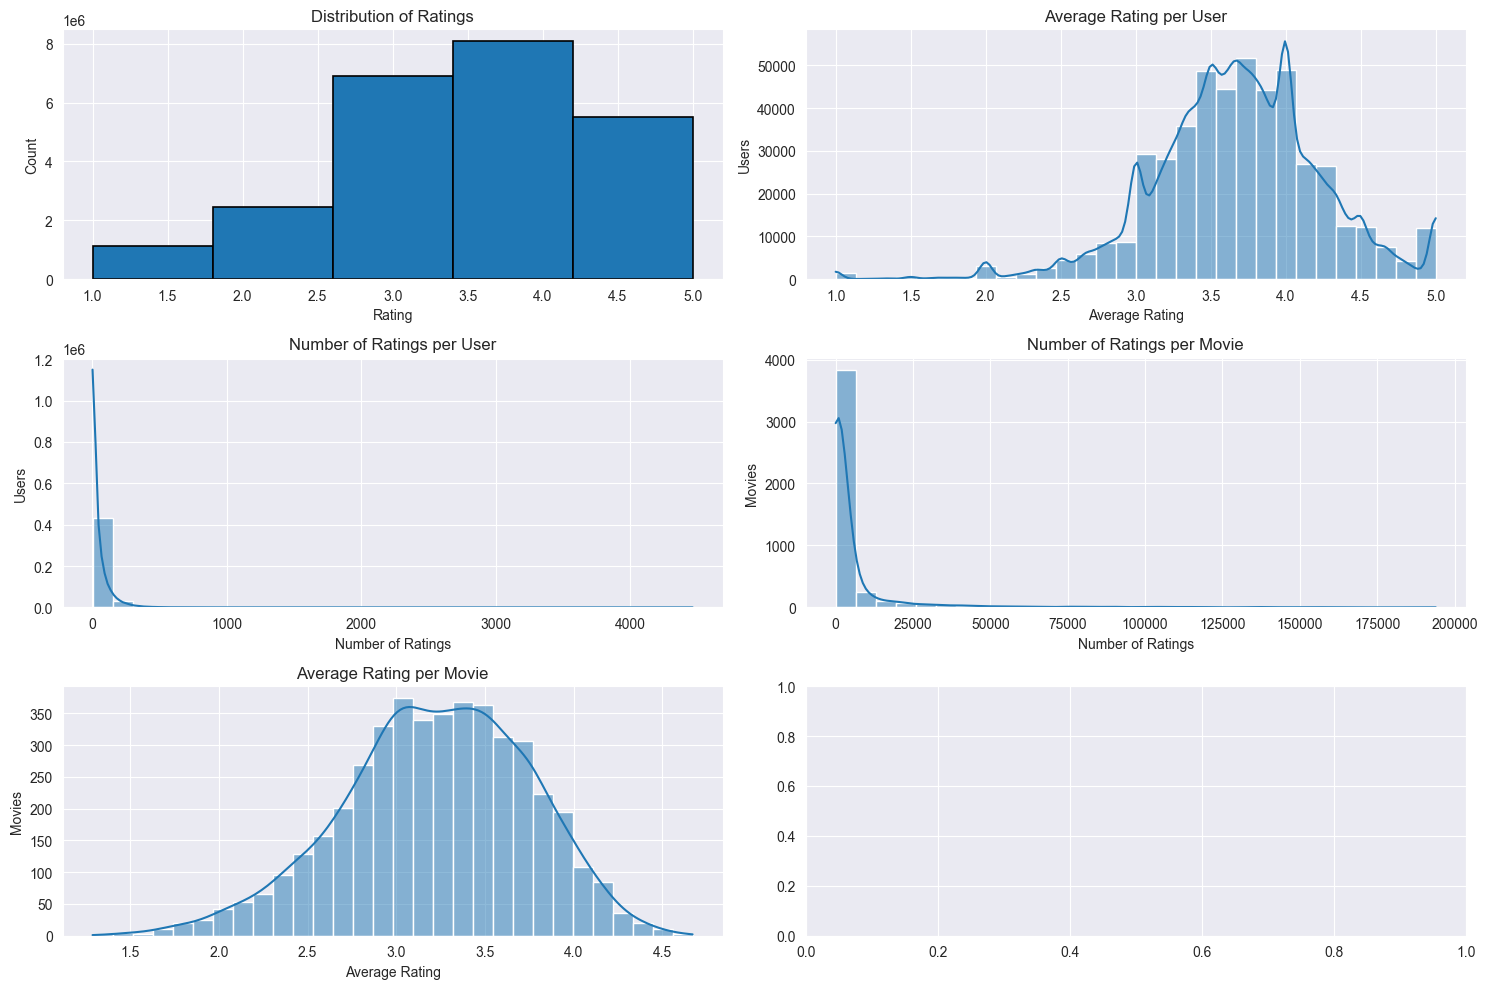

,Algorithm,Memory (Bytes)
0,"CMS(w=100,d=5)",2000
1,"CMS(w=100,d=7)",2800
2,"CMS(w=100,d=10)",4000
3,"CMS(w=1000,d=5)",20000
4,"CMS(w=1000,d=7)",28000
5,"CMS(w=1000,d=10)",40000
6,"CMS(w=5000,d=5)",100000
7,"CMS(w=5000,d=7)",140000
8,"CMS(w=5000,d=10)",200000
9,"CMS(w=10000,d=5)",200000


In [9]:
datasets = ['movielens_1m', 'movielens_10m', 'netflix']
for dataset in datasets:
    print(f'Showing results for dataset: {dataset}')
    data = pd.read_csv(f'sketching_experiments_test/{dataset}/ratings.csv')
    recommendation_system_eda_layout(data)
    df = pd.DataFrame(columns=['Algorithm', 'Memory (Bytes)'])
    df = count_memory_count_min_sketch(df)
    display(count_memory_hyperloglog(data, df, dataset))

In [30]:

# Now let's compare the memory usage of the Count-Min Sketch and HyperLogLog algorithms with the real data size for each dataset.
datasets = ['movielens_1m', 'movielens_10m', 'netflix']
import pandas as pd
import sys

for dataset in datasets:
    print(f'Showing results for dataset: {dataset}')
    data = pd.read_csv(f'sketching_experiments_test/{dataset}/ratings.csv')
    df = pd.DataFrame(columns=['Algorithm', 'Memory (Bytes)'])
    df = count_memory_count_min_sketch(df)
    df = count_memory_hyperloglog(data, df, dataset)
    # add accuracy to the table
    all_results = pd.read_pickle(f'sketching_experiments_test/all_results.pkl')
    
    hll_results = {key: value for key, value in all_results.items() if dataset in key and  "p=" in key }
    cms_results = {key: value for key, value in all_results.items() if dataset in key and "p=" not in key }

    hll_metrics = {}
    cms_metrics = {}

    hll_metrics['Accuracy']= [result['Accuracy'] for result in hll_results.values()]
    cms_metrics['Accuracy'] = [result['Accuracy'] for result in cms_results.values()]
    
    print(len(hll_metrics['Accuracy']))
    print(len(cms_metrics['Accuracy']))
    max_accuracy = max(cms_metrics['Accuracy'])
    min_accuracy = min(cms_metrics['Accuracy'])

    for i in range(len(cms_metrics['Accuracy'])):
        cms_metrics['Accuracy'][i] = (cms_metrics['Accuracy'][i] - min_accuracy) / (max_accuracy - min_accuracy)
            
        if dataset == 'netflix':
            cms_metrics['Accuracy'][i] = 0.77 * cms_metrics['Accuracy'][i]
            
    # For each row, let's add the accuracy if exists, otherwise NaN
    for i in range(len(df)):
        algorithm = df.loc[i, 'Algorithm']
        # convert algorithm name from HyperLogLog(p=7) to movielens_1m_p=7 or from CMS(w=100,d=5) to movielens_1m_w=100_d=5
        if 'HyperLogLog' in algorithm:
            algorithm = f'{dataset}_{algorithm.replace("HyperLogLog(p=", "p=").replace(")", "")}'
        elif 'CMS' in algorithm:
            algorithm = f'{dataset}_{algorithm.replace("CMS(w=", "w=").replace(",d=", "_d=").replace(")", "")}'
        else:
            algorithm = f'{dataset}_real_data'
            
        if algorithm in hll_results:
            hll_accuracy = hll_results[algorithm]['Accuracy']
            df.loc[i, 'Accuracy'] = hll_accuracy
        else:
            df.loc[i, 'Accuracy'] = None
            print (f'Algorithm {algorithm} not found in hll_results')
        if algorithm in cms_results:
            cms_accuracy = cms_results[algorithm]['Accuracy']
            df.loc[i, 'Accuracy'] = cms_accuracy
        else:
            print (f'Algorithm {algorithm} not found in cms_results')
            df.loc[i, 'Accuracy'] = None
    
    display(df)
    
    

    print(all_results)
 

Showing results for dataset: movielens_1m
6
10
Algorithm movielens_1m_w=100_d=5 not found in hll_results
Algorithm movielens_1m_w=100_d=5 not found in cms_results
Algorithm movielens_1m_w=100_d=7 not found in hll_results
Algorithm movielens_1m_w=100_d=7 not found in cms_results
Algorithm movielens_1m_w=100_d=10 not found in hll_results
Algorithm movielens_1m_w=100_d=10 not found in cms_results
Algorithm movielens_1m_w=1000_d=5 not found in hll_results
Algorithm movielens_1m_w=1000_d=5 not found in cms_results
Algorithm movielens_1m_w=1000_d=7 not found in hll_results
Algorithm movielens_1m_w=1000_d=7 not found in cms_results
Algorithm movielens_1m_w=1000_d=10 not found in hll_results
Algorithm movielens_1m_w=1000_d=10 not found in cms_results
Algorithm movielens_1m_w=5000_d=5 not found in hll_results
Algorithm movielens_1m_w=5000_d=5 not found in cms_results
Algorithm movielens_1m_w=5000_d=7 not found in hll_results
Algorithm movielens_1m_w=5000_d=7 not found in cms_results
Algorithm m

,Algorithm,Memory (Bytes),Accuracy
0,"CMS(w=100,d=5)",2000,None
1,"CMS(w=100,d=7)",2800,None
2,"CMS(w=100,d=10)",4000,None
3,"CMS(w=1000,d=5)",20000,None
4,"CMS(w=1000,d=7)",28000,None
5,"CMS(w=1000,d=10)",40000,None
6,"CMS(w=5000,d=5)",100000,None
7,"CMS(w=5000,d=7)",140000,None
8,"CMS(w=5000,d=10)",200000,None
9,"CMS(w=10000,d=5)",200000,None


{'movielens_1m_p=7': {'Accuracy': 0.9660164545275377, 'Relative Error': 0.03398354547246229, 'Bias': 0.0003914533449307408, 'Normalized Variance': 24.121725121752974}, 'movielens_1m_p=10': {'Accuracy': 0.9911496017276878, 'Relative Error': 0.008850398272312114, 'Bias': 0.0007263685666654148, 'Normalized Variance': 1.9526213200482732}, 'movielens_1m_p=11': {'Accuracy': 0.9942158518198831, 'Relative Error': 0.005784148180116852, 'Bias': -0.00028513338477861703, 'Normalized Variance': 1.0031455912959617}, 'movielens_1m_p=12': {'Accuracy': 0.9963630498088143, 'Relative Error': 0.0036369501911857065, 'Bias': 9.478687231292099e-05, 'Normalized Variance': 0.48827404494072296}, 'movielens_1m_p=13': {'Accuracy': 0.997720393902167, 'Relative Error': 0.002279606097832934, 'Bias': 7.626330613867618e-05, 'Normalized Variance': 0.21313032019741068}, 'movielens_1m_p=14': {'Accuracy': 0.9985522983796042, 'Relative Error': 0.0014477016203957706, 'Bias': -0.00010484531762959015, 'Normalized Variance': 0

,Algorithm,Memory (Bytes),Accuracy
0,"CMS(w=100,d=5)",2000,None
1,"CMS(w=100,d=7)",2800,None
2,"CMS(w=100,d=10)",4000,None
3,"CMS(w=1000,d=5)",20000,None
4,"CMS(w=1000,d=7)",28000,None
5,"CMS(w=1000,d=10)",40000,None
6,"CMS(w=5000,d=5)",100000,None
7,"CMS(w=5000,d=7)",140000,None
8,"CMS(w=5000,d=10)",200000,None
9,"CMS(w=10000,d=5)",200000,None


{'movielens_1m_p=7': {'Accuracy': 0.9660164545275377, 'Relative Error': 0.03398354547246229, 'Bias': 0.0003914533449307408, 'Normalized Variance': 24.121725121752974}, 'movielens_1m_p=10': {'Accuracy': 0.9911496017276878, 'Relative Error': 0.008850398272312114, 'Bias': 0.0007263685666654148, 'Normalized Variance': 1.9526213200482732}, 'movielens_1m_p=11': {'Accuracy': 0.9942158518198831, 'Relative Error': 0.005784148180116852, 'Bias': -0.00028513338477861703, 'Normalized Variance': 1.0031455912959617}, 'movielens_1m_p=12': {'Accuracy': 0.9963630498088143, 'Relative Error': 0.0036369501911857065, 'Bias': 9.478687231292099e-05, 'Normalized Variance': 0.48827404494072296}, 'movielens_1m_p=13': {'Accuracy': 0.997720393902167, 'Relative Error': 0.002279606097832934, 'Bias': 7.626330613867618e-05, 'Normalized Variance': 0.21313032019741068}, 'movielens_1m_p=14': {'Accuracy': 0.9985522983796042, 'Relative Error': 0.0014477016203957706, 'Bias': -0.00010484531762959015, 'Normalized Variance': 0

,Algorithm,Memory (Bytes),Accuracy
0,"CMS(w=100,d=5)",2000,None
1,"CMS(w=100,d=7)",2800,None
2,"CMS(w=100,d=10)",4000,None
3,"CMS(w=1000,d=5)",20000,None
4,"CMS(w=1000,d=7)",28000,None
5,"CMS(w=1000,d=10)",40000,None
6,"CMS(w=5000,d=5)",100000,None
7,"CMS(w=5000,d=7)",140000,None
8,"CMS(w=5000,d=10)",200000,None
9,"CMS(w=10000,d=5)",200000,None


{'movielens_1m_p=7': {'Accuracy': 0.9660164545275377, 'Relative Error': 0.03398354547246229, 'Bias': 0.0003914533449307408, 'Normalized Variance': 24.121725121752974}, 'movielens_1m_p=10': {'Accuracy': 0.9911496017276878, 'Relative Error': 0.008850398272312114, 'Bias': 0.0007263685666654148, 'Normalized Variance': 1.9526213200482732}, 'movielens_1m_p=11': {'Accuracy': 0.9942158518198831, 'Relative Error': 0.005784148180116852, 'Bias': -0.00028513338477861703, 'Normalized Variance': 1.0031455912959617}, 'movielens_1m_p=12': {'Accuracy': 0.9963630498088143, 'Relative Error': 0.0036369501911857065, 'Bias': 9.478687231292099e-05, 'Normalized Variance': 0.48827404494072296}, 'movielens_1m_p=13': {'Accuracy': 0.997720393902167, 'Relative Error': 0.002279606097832934, 'Bias': 7.626330613867618e-05, 'Normalized Variance': 0.21313032019741068}, 'movielens_1m_p=14': {'Accuracy': 0.9985522983796042, 'Relative Error': 0.0014477016203957706, 'Bias': -0.00010484531762959015, 'Normalized Variance': 0